# Exploring new features

In the previous notebook, we explored the target variable and the features that were already available. In this notebook, we will focus on the new features correlated with text data.

In [1]:
# import basic libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path  # for path related operations

pd.options.display.max_colwidth = 100  # to display full text in columns

In [2]:
# load data
data_path = Path("../../Data")
train_df = pd.read_csv(data_path / "train.csv")

In [3]:
# Name of the columns
text_col = "full_text"
numberic_cols = [
    "cohesion",
    "syntax",
    "vocabulary",
    "phraseology",
    "grammar",
    "conventions",
]
num_of_words = "num_of_words"

### Create numeber of words feature

In [4]:
# Add a column to store the number of words in the text
train_df[num_of_words] = train_df[text_col].apply(lambda x: len(x.split()))

<AxesSubplot: title={'center': 'Distribution of text length'}, ylabel='Frequency'>

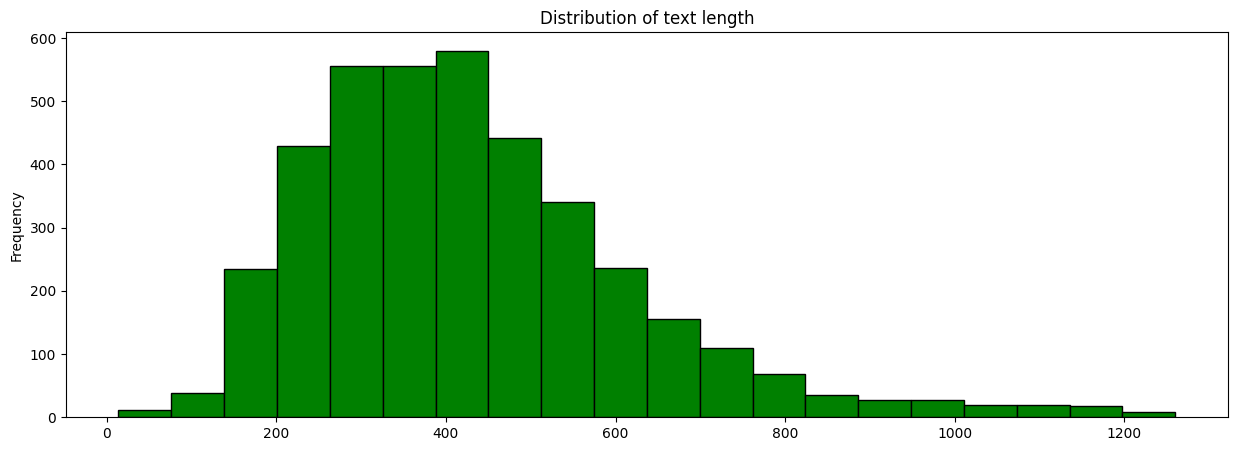

In [13]:
# Plot the distribution of text length
train_df[num_of_words].plot(
    kind="hist",
    figsize=(15, 5),
    bins=20,
    title="Distribution of text length",
    color="green",
    edgecolor="black",
    xlabel="Number of words",
    ylabel="Frequency",
)

<AxesSubplot: title={'center': 'num_of_words'}, xlabel='[cohesion, syntax, vocabulary, phraseology, grammar, conventions]'>

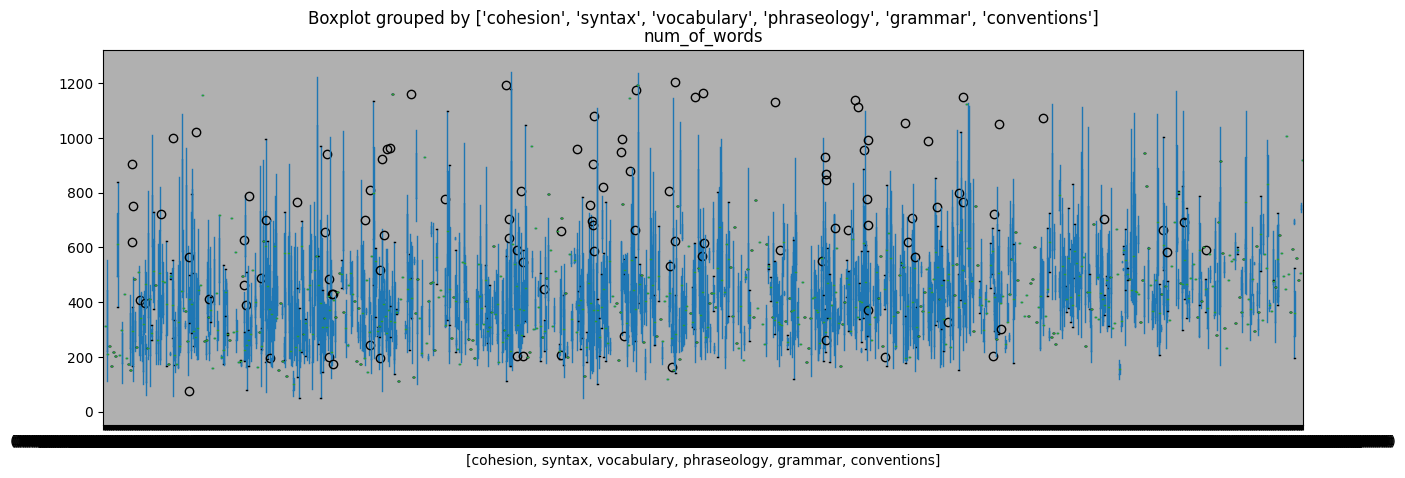

In [24]:
# Plotbox of the length of each text for each numeric feature
train_df.boxplot(column=num_of_words, by=numberic_cols, figsize=(15, 5))

### Do this for all numerical features separately

In [35]:
def plot_feature_vs_num_of_words(name_of_feature, train_df):
    """
    Plot the number of words in the text for each cohesion value
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=name_of_feature, y=num_of_words, data=train_df, palette="Set3")
    ax.set_title("Number of words in the text for each cohesion value")
    ax.set_xlabel(name_of_feature)
    ax.set_ylabel("Number of words")
    plt.show()

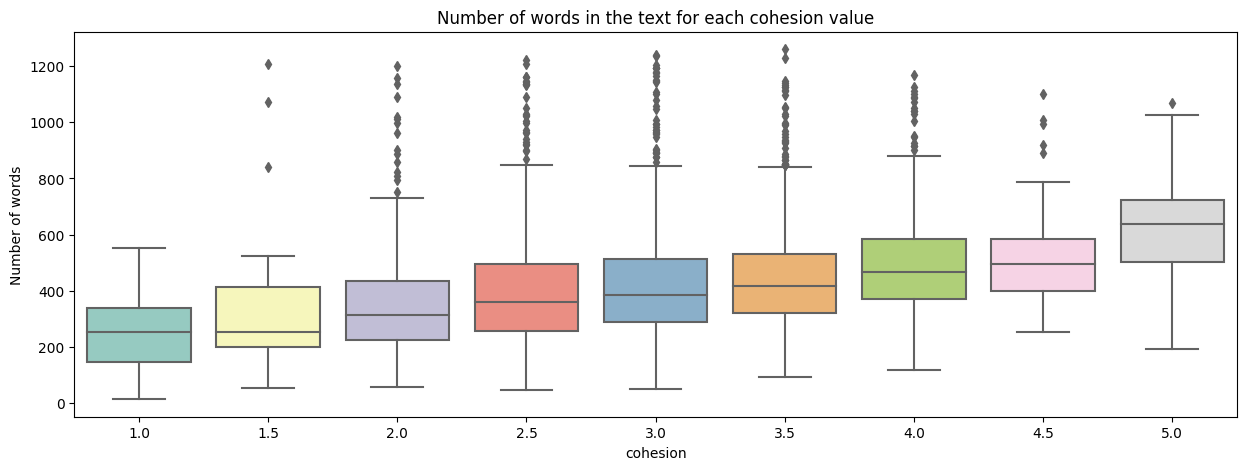

In [36]:
plot_feature_vs_num_of_words("cohesion", train_df)

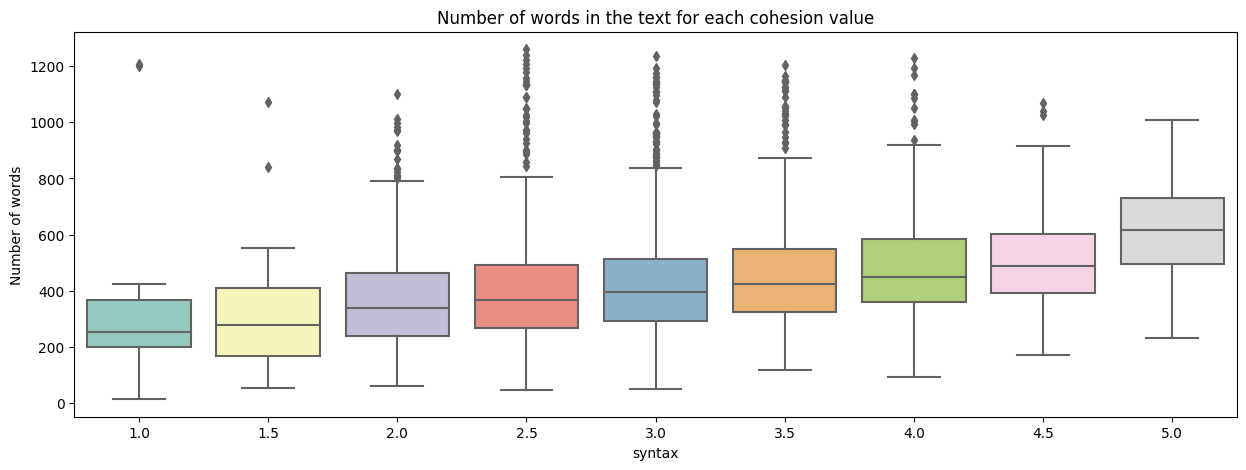

In [37]:
plot_feature_vs_num_of_words("syntax", train_df)

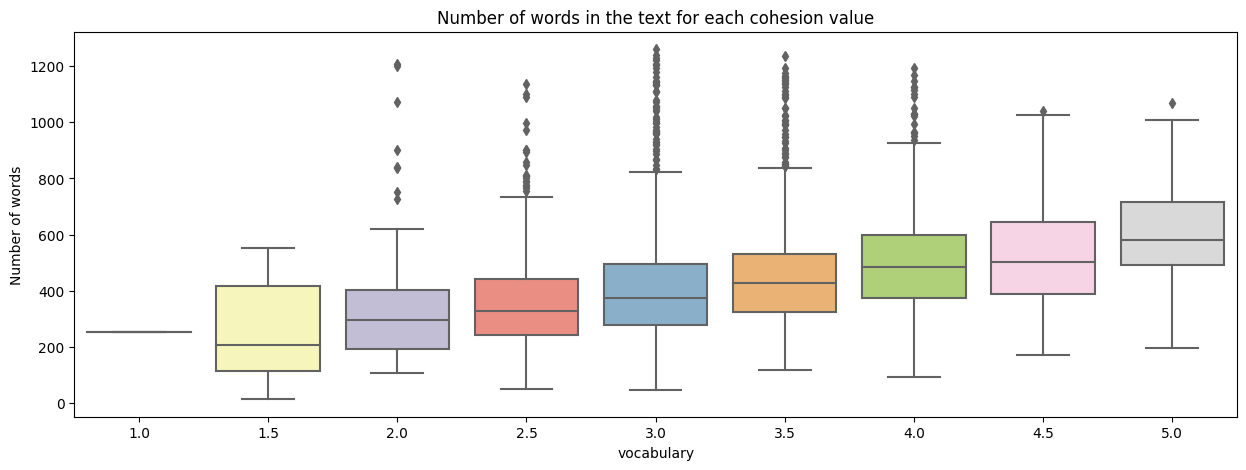

In [38]:
plot_feature_vs_num_of_words("vocabulary", train_df)

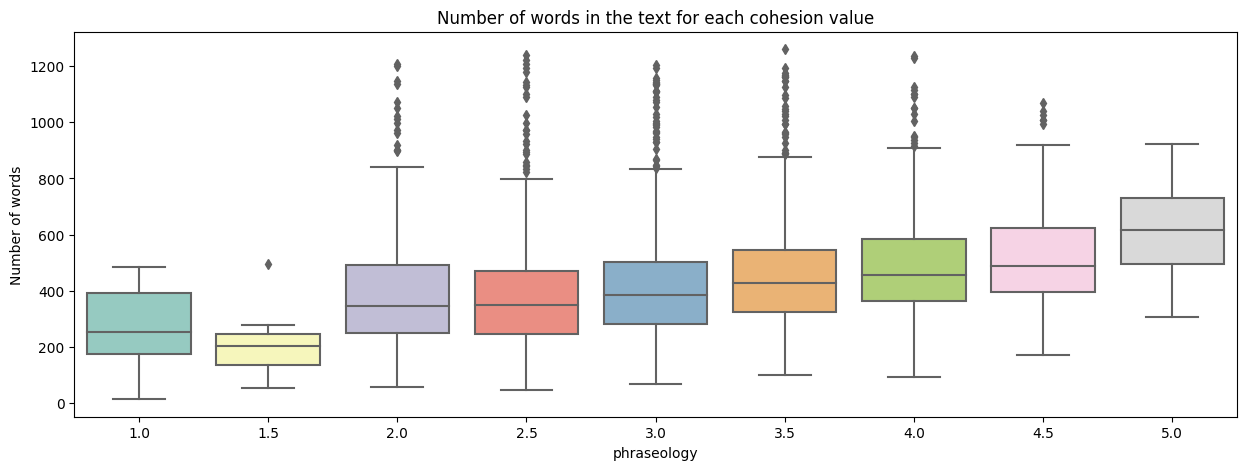

In [39]:
plot_feature_vs_num_of_words("phraseology", train_df)

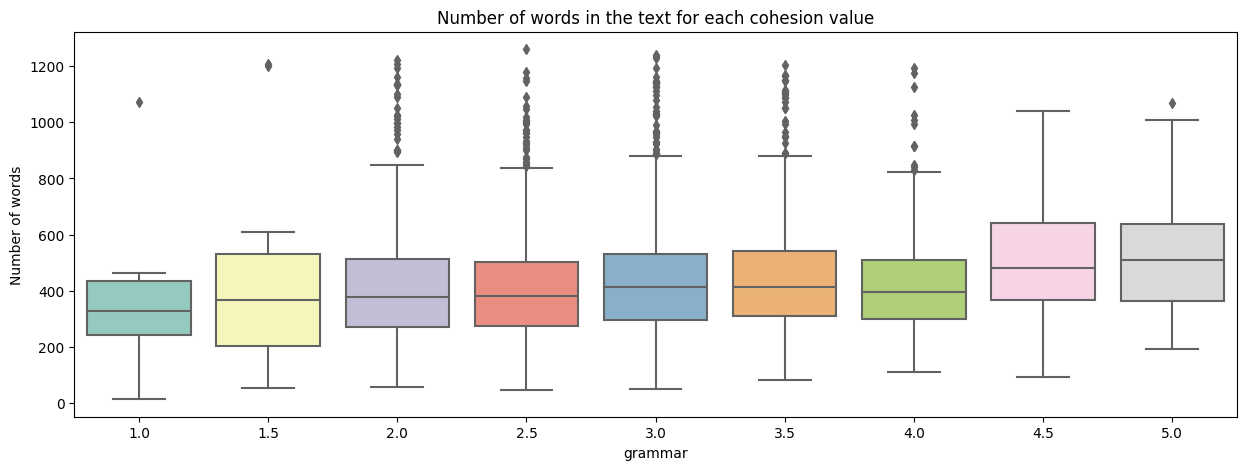

In [40]:
plot_feature_vs_num_of_words("grammar", train_df)

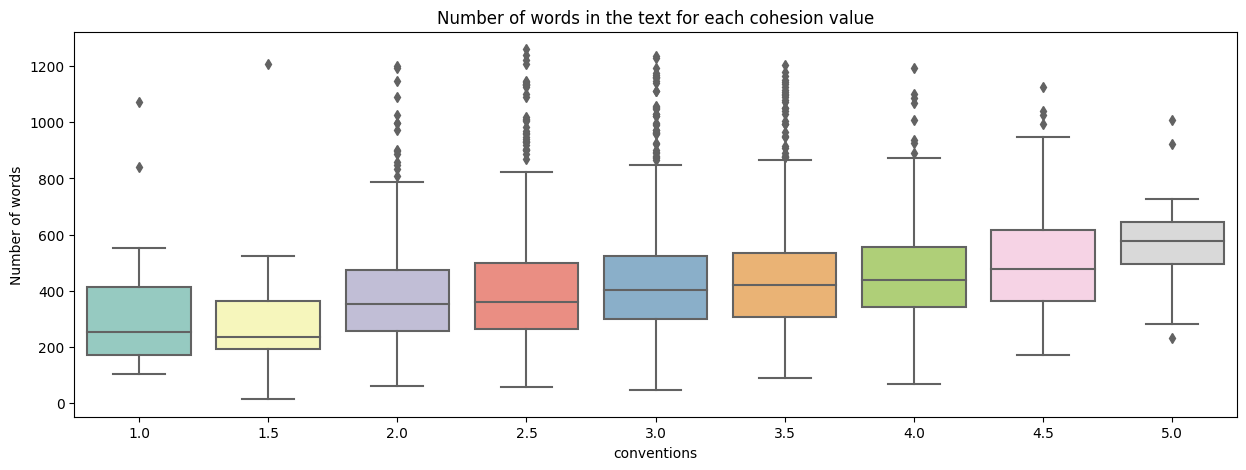

In [41]:
plot_feature_vs_num_of_words("conventions", train_df)

<AxesSubplot: >

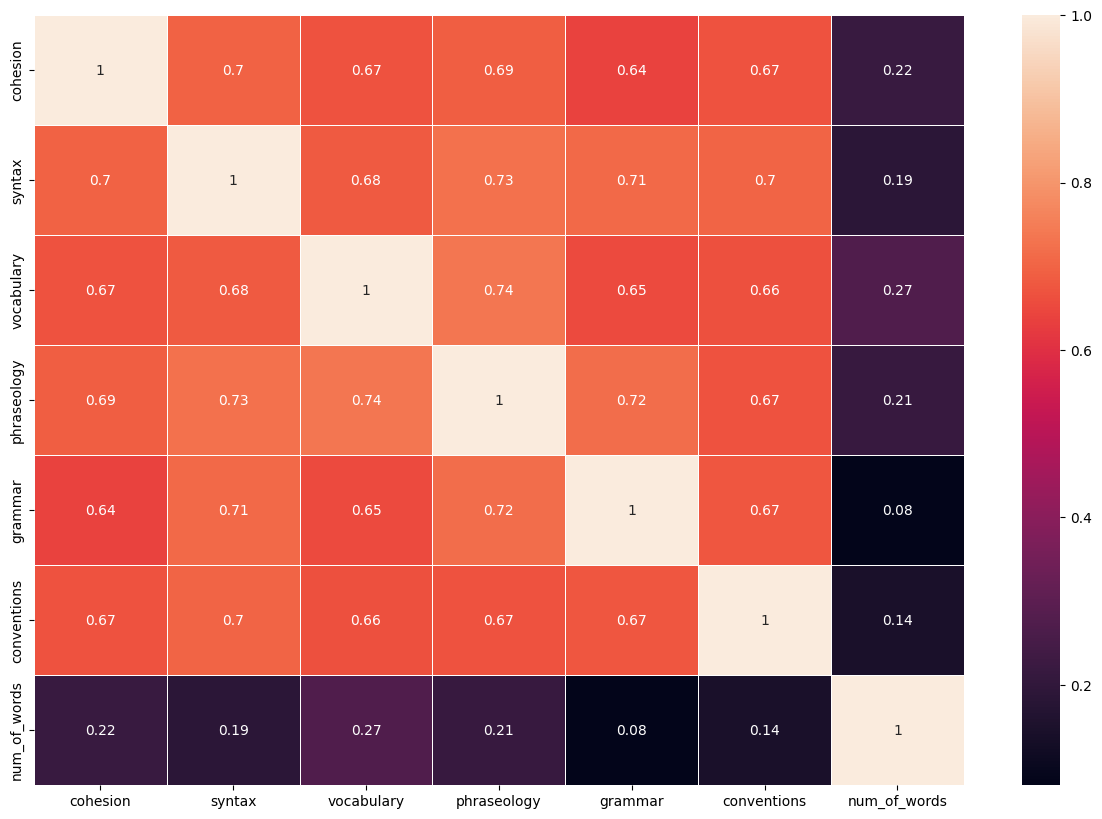

In [48]:
# Plot correlation matrix
corr = train_df[numberic_cols + [num_of_words]].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linewidths=0.5,
    ax=ax,
)

### Create feater with percent of punctuation marks

In [5]:
import re

In [13]:
percent_of_punctation = "percent_of_punctation"
puncation_pattern = r"[^\w\s]"

In [15]:
# Create a new column to store the percentage of punctuation marks in the text
train_df[percent_of_punctation] = train_df[text_col].apply(
    lambda x: len(re.findall(puncation_pattern, x)) / len(x.split())
)

In [16]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,num_of_words,percent_of_punctation
0,0016926B079C,"I think that students would benefit from learning at home,because they wont have to change and g...",3.5,3.5,3.0,3.0,4.0,3.0,261,0.080460
1,0022683E9EA5,When a problem is a change you have to let it do the best on you no matter what is happening it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,0.039400
2,00299B378633,"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Becaus...",3.0,3.5,3.0,3.0,3.0,2.5,320,0.112500
3,003885A45F42,"The best time in life is when you become yourself. I agree that the greatest accomplishment, is ...",4.5,4.5,4.5,4.5,4.0,5.0,728,0.148352
4,0049B1DF5CCC,Small act of kindness can impact in other people can change people to become better persons you ...,2.5,3.0,3.0,3.0,2.5,2.5,234,0.012821


In [ ]:
# Plot the distribution of the percentage of punctuation marks in the text
train_df[percent_of_punctation].plot(
    kind="hist",
    figsize=(15, 5),
    bins=20,
    title="Distribution of the percentage of punctuation marks in the text",
    color="green",
    edgecolor="black",
    xlabel="Percentage of punctuation marks",
    ylabel="Frequency",
)